# ACTIVE MAGNETIC REFRIGERATION REGENERATOR(AMRR)

The magnetic refrigeration, is a type of a solid state refrigeration, used wtih magnetocaloric effect that entropy change during magnetization and demagnetization. The model proposed the one dimensional(1-D) active magnetic refrigeration regenerator. The external equipments are explicity modelled such as pumps, heat exchanger, and permanent magnets etc. 

The heat transfer fluids enter the regenerator in the positive x direction at the hot end and removed the heat to enviroment(Hot-to-cold flow). The heat absorbed process occurs a negative mass flow rate, similarly enters the cold side and leave the hot side of the regenerator(Cold-to-hot flow).   

## Mean Field Theory

The mean field theory decribe the relation between magnetocaloric variables to thermodynamics properties. The mean field model predict the adiabatic temperature change of Gadolinium, which has Curie temperature close to the room temperature. Compared the experimentation, mean field theory acceptable modelled the magnetocaloric materials near the Curie temperature.

We can describe the total entropy as a function of the magnetic entropy, lattice entropy and electron entropy. An electron entropy neglected to the compered the magnitude of the magnetic and lattice entropy.

\begin{equation}  S_T(B,T) = S_m(B,T) + S_l(T) + S_e(T)  \end{equation}

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

/home/cagri/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### The properties of a Gadolinium

In [4]:
R_u = 8.314             # Gas constant
M_m = 0.15725           # Molar mass of the Gadolinium
g_j = 2.0               # Spectroscpic splitting factor
J = 3.5                 # Total angular momentum
T_c = 293.0             # Curie temperature [K]
T_d = 184.0             # Debye temperature [K]
mu_b = 9.270154e-24     # Bohr magneton [J/T]
K = 1.380622e-23        # Boltzmann constant [J/K]

### The magnetic entropy

The present chapter gives the calculation of the magnetic entropy for magnetocaloric material, Gadolinium. Magnetic entropy depends on Brillouins function $B_j(X)$ and $X$.

\begin{equation}S_{magnet} = \frac{R_u}{M_m}  ln \bigg( \frac{\sinh(\frac{2J + 1}{2J}X)}{\sinh(\frac{X}{2J} )} - X B_j(X) \bigg) \end{equation}

The Brillouins function $B_j(X)$ expressed as,

\begin{equation} B_j(X) = \frac{2J+1}{2J}  \coth \bigg(\frac{2J + 1}{2J}X \bigg) - \frac{1}{2J} \coth \bigg(\frac{X}{2J} \bigg) \end{equation}

$X(B_j)$ is descriped as,


\begin{equation} X(B_j) = \frac{g_j \mu_b B}{KT} + \frac{3 T_c B_j(X)}{T(J+1)} \end{equation}

In [5]:
def S_mag(Temp, B):
    '''
    The function determined magnetic entropy of magnetocaloric materials using with Molecular Field Theory.
    
    Input : Temperature is an float number 
            B is an float number, represent the magnetic field intensity
            
    Output : S_mag is an float, represent magnetic entropy at particular temperature
    and the magnetci field intensity
    '''
    assert (B > 0.0001), 'The magnetic field is not acceptable range'
    assert numpy.all(Temp > 2.0), 'Temperature value is not acceptable range'
    
    maxIter = 10000
    eps = 1e-4
    
    index = 0
    X = 1.0
    A1 = (2.0*J + 1.0)/(2.0*J)
    A2 = 1.0/(2.0*J)
    
    while True:
        B_j = A1/(numpy.tanh(A1*X)) - A2/(numpy.tanh(A2*X))
        X_dummy = (g_j*mu_b*B*J)/(K*Temp) + (3.0*T_c*B_j*J)/(Temp*(J + 1.0))
        error = abs((X - X_dummy)/X)*100
        if numpy.all(error < eps):
            break
        if (index > maxIter):
            break
        index = index + 1
        X = X_dummy
    
    S_mag = (R_u/M_m)*(numpy.log(numpy.sinh(A1*X)/numpy.sinh(A2*X)) - X*B_j)
    return S_mag

### Lattice entropy(The Debye Theory)

The lattice entropy interpolated with using Debye temperature,

\begin{equation}S_{lattice} = -3\frac{R_u}{M_m}  ln(1 - e^{-T_D/T}) + 12(\frac{T}{T_D})^3 \int _{0} ^{\frac{T_D}{T}} \frac{x^3dx}{e^x-1} \end{equation}

In [6]:
def S_lat(Temp):
    '''
    The function determined lattice entropy of magnetocaloric materials with using Molecular Field Theory.
    
    Input : Temperature is an float number. 
            
    Output : S_lat is an float, represent lattice entropy at particular temperature.
    '''
    assert numpy.all(Temp > 2.0), 'Temperature value is not acceptable range'
    
    
    delta = (T_d/Temp)/100.
    
    for i in range (1,101):
        x = delta*i
        x0 = delta*(i - 1)
    
        if (i == 1):
            sum = 0.0
        else:
            sum = sum + ((numpy.power(x,3)/(numpy.exp(x) - 1.0) + (numpy.power(x0,3)/(numpy.exp(x0) - 1.0)))*delta/2.)
    
    S_lat = (R_u/M_m)*(-3.0*numpy.log(1.0 - numpy.exp(-T_d/Temp)) + 12.0*numpy.power((Temp/T_d),3)*sum)
    return S_lat

### The heat capacity of magnetocaloric material(The Weiss mean field theory) 

The Weiss moleculer mean field theory determine the total heat capacity as,

\begin{equation}  C_{Gd} = T \frac{dS}{dB}  \end{equation}

In [7]:
def C_gd(Temp, B):
    '''
    The function determined the heat capacity of magnetocaloric materials with Molecular Field Theory.
    
    Input : Temperature is an float number. 
            B is an float number, represent the magnetic field intensity
            
    Output : C_gd is an float, represent the heat capacity at particular temperature and magnetic field intensity.
    '''
    assert numpy.all(Temp > 2.0), 'Temperature value is not acceptable range'
    assert (B > 0.0001), 'The magnetic field is not acceptable range'
    
    delta = 0.1
    
    s2dT = S_mag(Temp + 2.0*delta, B) + S_lat(Temp + 2.0*delta)
    sdT = S_mag(Temp + delta, B) + S_lat(Temp + delta)
    s_2dT = S_mag(Temp - 2.0*delta, B) + S_lat(Temp - 2.0*delta)
    s_dT = S_mag(Temp - delta, B) + S_lat(Temp - delta)   

    dsdT = (-s2dT + 8.0*sdT - 8.0*s_dT + s_2dT)/(12.0*delta)
    
    C_gd = dsdT*Temp
    return C_gd

### The magnetic entropy change  ($\Delta S_{m}$)

 A magnetic entropy change calculated in the field from zero, represent reference entropy, to current magnetic field intensity. In this project, magnetic field formulated as a linear relation with time to simply complexitiy of the problem. The reference entropy becomes the  entropy at previous magnetic field intensity

\begin{equation}  \Delta S_m(B,T) = S_m(B,T) - S_m(0,T)  \end{equation}

or

\begin{equation}  \Delta S_m(B,T) = S_m(B_i,T) - S_m(B_{i-1},T)  \end{equation}

The total entropy change also referred the partial entropy changing with respect to magnetic field intensity as constant temperature,

\begin{equation}  \Delta S_m(B,T) = \frac{\partial S}{\partial B} \end{equation}

In [8]:
def del_s(Temp, B_cur, B_pre = 0.0002):
    '''
    The function determined the magnetic entropy change of magnetocaloric materials with Molecular Field Theory.
    
    Input : Temperature is an float number. 
            B_cur is an float number, represent the current magnetic field intensity
            B_pre is an float number, represent the previous magnetic field intensity. The default value of previous
    magnetic field intensity is 0.0002 Tesla
            
    Output : ds_dB is an float, represent the entropy change at particular temperature and magnetic field intensity.
    '''
    assert numpy.all(Temp > 2.0), 'Temperature value is not acceptable range'
    assert (B_cur > 0.0001), 'The magnetic field is not acceptable range'
    assert (B_pre > 0.0001), 'The magnetic field is not acceptable range'

    
    S_cur = S_mag(Temp, B_cur)
    S_ref = S_mag(Temp, B_pre)
    
    del_s = (S_cur - S_ref)
    return del_s

### The adiabatic temperature change ($\Delta T_{ad}$)

The adiabatic temperature change represent the temperature increased or decresed during magnetization or demagnetization with respect to order. The changing temperature plug into the equation as a source term,

\begin{equation}  \Delta T_{ad} = - \frac{T}{C_{gd}} \frac{\partial S}{\partial B} \end{equation}

In [9]:
def delT_ad(Temp, B_cur, B_pre = 0.0002):
    '''
    The function determined the adiabatic temperature change of magnetocaloric materials with Molecular Field Theory.
    
    Input : Temperature is an float number. 
            B_cur is an float number, represent the current magnetic field intensity
            B_pre is an float number, represent the previous magnetic field intensity. The default value of previous
    magnetic field intensity is 0.0002 Tesla
            
    Output : delT_ad is an float, represent the adiabatic temperature change at particular temperature and magnetic 
    field intensity.
    '''

    assert numpy.all(Temp > 2.0), 'Temperature value is not acceptable range'
    assert (B_cur > 0.0001), 'The magnetic field is not acceptable range'
    assert (B_pre > 0.0001), 'The magnetic field is not acceptable range'

    

    delT_ad = -del_s(Temp, B_cur, B_pre) * Temp / C_gd(Temp, B_cur)
    return delT_ad

## Magnetocaloric Source Term

The magnetocaloric effect expressed as source term with using moleculer mean field theory. The magnetic field intensity at the material($B$) assumed a linear changing with time during magnetization and demagnetization process. The adiabatic temperature change and heat capacity calculated at the particular temperature and magnetic field intensity. 

### Calculation period

Calculation number of period that determined which state of magnetization, de-magnetization etc.

In [10]:
def per(j, dt, t_mag, t_demag, t_flow1, t_flow2):
    '''
    The function determined the time where located(magnetization, demagnetization, hot-to-cold, cold-to-hot) in the cycle.
    
    Input : j is an integer, as the time step.
            dt is an float number, represent the time step size
            t_mag is an float number, represent the magnetization time.
            t_demag is an float number, represent the demagnetization time.
            t_flow1 is an float number, represent the hot to cold flow time.
            t_flow2 is an float number, represent the cold to hot time.
            
    Output : per_num is an float, represent the which process in the cycle
    '''
    time = j * dt
    t_per = t_mag + t_demag + t_flow1 + t_flow2
    per_num = numpy.remainder(time, t_per)
    
    return per_num

### Interpolation of the magnetic field intensity ($B$)

In [11]:
def B_func(B_max, B_min, per_num, t_mag, t_demag, t_flow1, t_flow2):
    
    if (per_num <= t_mag and per_num > 0.0):                         # Magnetization
        B_cur = (B_max - B_min)/t_mag*per_num + B_min
        
    elif (per_num <= t_mag + t_flow1 and per_num > 0.0):             # Heat rejected
        B_cur = B_max

    elif (per_num <= t_mag + t_flow1 + t_demag and per_num > 0.0):   # De-magnetization
        B_cur = B_max - (B_max - B_min)/t_demag*(per_num - t_mag - t_flow1)

    elif (per_num <= t_mag + t_flow1 + t_demag + t_flow2):            # Heat gain
        B_cur = B_min
    
    return B_cur

### The heat capacity ($C_P$)

The function interpolated the heat capacity of the magnetocaloric material with respect to time.

In [12]:
def C_solid(j, dt, t_mag, t_demag, t_flow1, t_flow2, Temp, B_max, B_min):
    '''
    The function determined the heat capacity with Molecular Field Theory.
    
    Input : rho is an float, represent the density
            j is an integer, as the time step.
            dt is an float number, represent the time step size
            t_mag is an float number, represent the magnetization time.
            t_demag is an float number, represent the demagnetization time.
            t_flow1 is an float number, represent the hot to cold flow time.
            t_flow2 is an float number, represent the cold to hot time.
            Temp is represented temperature is an float number
            B_max is an float number, represent the maximum magnetic field intensity
            B_pre is an float number, represent the previous magnetic field intensity. The default value of previous
    magnetic field intensity is 0.0002 Tesla
            
    Output : C_solid is an float, represent the heat capacity at particular conditions.
    '''

    per_num = per(j, dt, t_mag, t_demag, t_flow1, t_flow2)
    
    B_cur = B_func(B_max, B_min, per_num, t_mag, t_demag, t_flow1, t_flow2)
    
    C_solid = C_gd(Temp, B_cur)

    return C_solid

### The adiabatic temperature change ($\Delta T_{ad}$)

In [18]:
def delT(j, dt, t_mag, t_demag, t_flow1, t_flow2, Temp, B_max, B_min):
    '''
    The function determined the adiabatic temperature change with Molecular Field Theory.
    
    Input : j is an integer, as the time step.
            dt is an float number, represent the time step size
            t_mag is an float number, represent the magnetization time.
            t_demag is an float number, represent the demagnetization time.
            t_flow1 is an float number, represent the hot to cold flow time.
            t_flow2 is an float number, represent the cold to hot time.
            Temp is represented temperature is an float number
            B_max is an float number, represent the maximum magnetic field intensity
            B_pre is an float number, represent the previous magnetic field intensity. The default value of previous
    magnetic field intensity is 0.0002 Tesla
            
    Output : C_solid is an float, represent the heat capacity at particular conditions.
    '''

    per_num = per(j, dt, t_mag, t_demag, t_flow1, t_flow2)
    
    B_cur = B_func(B_max, B_min, per_num, t_mag, t_demag, t_flow1, t_flow2)
    B_pre = B_func(B_max, B_min, per_num-dt, t_mag, t_demag, t_flow1, t_flow2)

    
    if (per_num <= t_mag and per_num > 0.0):                         # Magnetization
        delT = delT_ad(Temp, B_cur, B_pre)
      
    elif (per_num <= t_mag + t_flow1 and per_num > 0.0):             # Heat rejected
        delT = 0.0
    elif (per_num <= t_mag + t_flow1 + t_demag and per_num > 0.0):   # De-magnetization
        delT = -delT_ad(Temp, B_pre, B_cur)
        
    elif (per_num <= t_mag + t_flow1 + t_demag + t_flow2):            # Heat gain
        delT = 0.0
            
    return delT

# Porousitiy, Packed Bed

The regenerator consist of particular type of matrix(e.g. packed bed of sphere). The variables of bed are the length($L$), cross-section area($A_c$), hydraulic diameter($h_d$), volume-specific surface area($a_s$) and porosity($\epsilon$)

### The hydraulic diameter($h_d$)

The hydraulic diameter is defined as,

\begin{equation} d_h = \frac{2}{3} \frac{\epsilon}{1-\epsilon}d_p \end{equation}

where $d_p$ is the particle/sphere diameter

In [14]:
def d_h(eps, d_p):
    
    d_h = 2./3. * eps / (1. - eps) * d_p
    return d_h

### Reynolds number

The Reynolds number for packed sphere is based on the hydraulic diameter,

\begin{equation} Re_f = \frac{\rho_f v d_h}{\mu_f}  \end{equation}

where $v$ is the open area fluid velocity

In [21]:
def Re_f(rho_f, v, mu_f, eps, d_p):
    
    d = d_h(eps, d_p)
    Re_f = rho_f * v * d / mu_f
    return Re_f

However, many correlation for packed sphere regenerators are presented in terms of Reynolds number based on a particul diameter

\begin{equation} Re_f = \frac{\rho_f v d_p}{\mu_f}  \end{equation}

In [14]:
def Re_p(rho_f, v, mu_f, d_p):
    
    Re_p = rho_f * v * d_p / mu_f
    return Re_p

### Prandtl number

\begin{equation} Pr_f = \frac{c_f \mu_f}{k_f}  \end{equation}

In [15]:
def Pr(c_f, mu_f, k_f):
    
    Pr = c_f * mu_f / k_f
    return Pr

### The volume-specific area

The volueme-specific area(the surface area of the spheres availabiable for heat transfer per unit volume of regenerator) is determined

\begin{equation} a_s = 6 \frac{1 - \epsilon}{d_p}  \end{equation}

In [16]:
def a_s(eps, d_p):
    
    a_s = 6. * (1. - eps) / d_p
    return a_s

### Pressure drop

To predict the pressure drop in a particle sphere is calculated a friction factor for use in governing equation

\begin{equation} Source_{friction} =  \frac{f_f \dot m^3}{2 \rho_f^2 A_c^2 d_h} ~~~~~~~~~~~~~~~~~~~  \bigg[\frac{W}{m^3} \bigg] \end{equation} 

where $f_f$ defined as,

\begin{equation} f_f = 240 \frac{(1-\epsilon)}{\epsilon^2 Re_f} + 3.6\frac{(1-\epsilon)}{\epsilon^3}  \end{equation}

In [17]:
def f_f(rho_f, v, mu_f, eps, d_p):
    
    Re = Re_f(rho_f, v, mu_f, eps, d_p)
    f_f = 240*(1. - eps)/(eps**2 * Re) + 3.6*(1. - eps)/(eps**3)
    return f_f

In [18]:
def S_fric(m_dot, rho_f, mu_f, eps, d_p, A_c):
    
    v = m_dot / (A_c * rho_f)
    f = f_f(rho_f, v, mu_f, eps, d_p)
    d = d_h(eps, d_p)

    S_fric = numpy.abs((f * m_dot**3) / (2. * rho_f**2 * A_c**2 * d))
   
    return S_fric

### Convective heat transfer coefficient ($h_f$)

The heat transfer coefficient($h_f$) for the packed bed defined as,

\begin{equation} h_f = \frac{Nu k_f}{d_h} a_s  \end{equation}

Nusselt number on the fluid temperature values in the nodes depends upon Reynolds and Prandlt number,

\begin{equation} Nu_x = Nu(Re_x, Pr_x)  \end{equation}

The following emprical correlation for the Nusselt number in a packed sphere bed,

\begin{equation} Nu_f = 2 + 1.1 Re_p^{0.6} Pr_f^{1/3}  \end{equation}


In [44]:
def Nu_f(rho_f, v, mu_f, c_f, k_f, d_p):
    
    Re = Re_p(rho_f, v, mu_f, d_p)
    Pr_f = Pr(c_f, mu_f, k_f)
    
    Nu_f = 2. + 1.1 * (Re**(0.6) * Pr_f**(1./3.))
    
    return Nu_f

In [45]:
def h_f(m_dot, A_c, rho_f, c_f, mu_f, k_f, eps, d_p):
    
    v = m_dot / (A_c * rho_f)
    d = d_h(eps, d_p)
   
    a_specific = a_s(eps, d_p)
    Nu = Nu_f(rho_f, v, mu_f, c_f, k_f, d_p)
    print Nu
    
    h_f = Nu * k_f * a_specific / d 
    return h_f

### Axial conduction

Dispersion, in the regenerator acts to mix fluid along the bed in the direction of flow. The total axial conductivity of a regenerator bed is related to bed dispersion($k_fD_d$ where $D_d$ is unitless disperison coefficient) and static effective thermal conductivity($k_{static}$)

The total effective thermal conductivity($k_{eff}$) can be expressed as the sum of the dispersive and static components

\begin{equation} k_{eff} = k_{static} + k_fD_d  \end{equation}

where $k_{static}$ is the effective thermal conductivity of the regenerator bed when there is no flow

A correlation for the static fluid conductivity in a periodic porous structure

\begin{equation}    k_{static} = k_f \bigg[ (1-a_0) \frac{ \epsilon f_0 + k_r/k_f(1-\epsilon f_0)}{1- \epsilon(1-f_0)+k_r/k_f \epsilon(1-f_0)} + a_0 \frac{ 2(k_r/k_f)^2 (1 - \epsilon) + (1 + 2 \epsilon) k_r/k_f }{ (2 + \epsilon)k_r/k_f + 1 - \epsilon } \bigg]    \end{equation}

where

\begin{equation}    f_0 = 0.8 + 0.1 \epsilon    \end{equation}


\begin{equation}    if\   \ 0 \leq \epsilon \leq 0.0827, \    \   a_0 = 10^{-4.898 \epsilon}  \end{equation}

\begin{equation}    if\   \ 0.0827 \leq \epsilon \leq 0.298, \    \   a_0 = 10^{-0.405 - 3.154(\epsilon - 0.0827)}  \end{equation}

\begin{equation}    if\   \ 0.298 \leq \epsilon \leq 0.528, \    \   a_0 = 10^{-1.084 - 6.778 (\epsilon - 0.298)}  \end{equation}

for $\epsilon$ < 0.58

A theoretical model of disperison in a uniformly bed of spheres

\begin{equation}    D_d = \epsilon \frac {3}{4} Pe_f    \end{equation}

where \begin{equation}  Pe_f = Re_fPr_f    \end{equation}

If there is no flow ($Re_f = 0$), axial disperison is ignored.

#### Dispersion thermal conductivity

In [21]:
def D_d(rho_f, mu_f, c_f, k_f, eps, d_p, v):
    
    Pr_f = Pr(c_f, mu_f, k_f)
    Re = Re_f(rho_f, v, mu_f, eps, d_p)
    
    Pe_f = Re * Pr_f
    D_d = eps * 3. / 4. * Pe_f
    
    return D_d

In [22]:
def k_disp(rho_f, mu_f, c_f, k, k_f, eps, d_p, v, per_num, t_mag, t_demag, t_flow1, t_flow2):
    
    
    Disp = D_d(rho_f, mu_f, c_f, k_f, eps, d_p, v)
    
    if (per_num <= t_mag and per_num > 0.0):                         # Magnetization
        k_disp = 0.
        
    elif (per_num <= t_mag + t_flow1 and per_num > 0.0):             # Heat rejected
        k_disp = k * Disp

    elif (per_num <= t_mag + t_flow1 + t_demag and per_num > 0.0):   # De-magnetization
        k_disp = 0.

    elif (per_num <= t_mag + t_flow1 + t_demag + t_flow2):            # Heat gain
        k_disp = k * Disp
        
    return k_disp

#### Efective thermal conductivity

In [23]:
def k_static(eps, k_f, k_r):
    
    f_0 = 0.8 * 0.1 * eps
    if (eps >= 0. and eps <= 0.0827):
        a_0 = 10**(-4.898 * eps)
    
    elif (eps > 0.0827 and eps <= 0.298):
        a_0 = 10**(-0.495-3.154 * (eps - 0.0827))
    
    elif (eps > 0.298 and eps <= 0.58):
        a_0 = 10**(-1.084-6.778 * (eps - 0.298))
    
    else:
        print 'Porosity is not accebtable'
    assert eps <= 0.58, 'Not a valid porosity'
    
    k_static = k_f * ( (1.-a_0)*(eps*f_0 + k_r/k_f*(1-eps*f_0))/(1. - eps*(1.-f_0) + k_r/k_f*eps*(1.-f_0)) + \
                      a_0*(2.*(k_r/k_f)**2*(1.-eps) + (1. + 2.*eps)*k_r/k_f)/((2.+eps)*k_r/k_f + 1. - eps))
        
    return k_static

In [24]:
def k_eff(rho_f, mu_f, c_f, k_s, k_f, eps, d_p, v, per_num, t_mag, t_demag, t_flow1, t_flow2):
    
    k_stat = k_static(eps, k_f, k_s)
    k_disp_solid = k_disp(rho_f, mu_f, c_f, k_s, k_f, eps, d_p, v, per_num, t_mag, t_demag, t_flow1, t_flow2)
    
    k_eff = k_stat + k_disp_solid
    
    return k_eff

### Mass flow rate

In [25]:
def m_d_mag(m_dot, per_num, t_mag, t_demag, t_flow1, t_flow2):
    
    if (per_num <= t_mag and per_num > 0.0):                         # Magnetization
        m_d = 0.0
        
    elif (per_num <= t_mag + t_flow1 and per_num > 0.0):             # Heat rejected
        m_d = m_dot

    elif (per_num <= t_mag + t_flow1 + t_demag and per_num > 0.0):   # De-magnetization
        m_d = 0.0

    elif (per_num <= t_mag + t_flow1 + t_demag + t_flow2):            # Heat gain
        m_d = -m_dot
    
    return m_d

# Numerical Methods (Finite Volume Method)

In [26]:
def TDMA(a_P, a_E, a_W, b, nx):
    T = numpy.zeros(nx)
    P = numpy.zeros(nx)
    Q = numpy.zeros(nx)
    
    a_E = -a_E.copy()
    a_W = -a_W.copy()
    
    P[0] = a_P[0]
    Q[0] = b[0] / P[0]
    for i in range(1, nx):
        P[i] = a_P[i] - a_W[i] * a_E[i-1] / P[i-1]
        Q[i] = (b[i] - a_W[i] * Q[i-1]) / P[i]
    
    T[nx-1] = Q[nx-1]
    for i in range(nx-2, -1, -1):
        T[i] = Q[i] - a_E[i] * T[i+1] / P[i]
        
    return T

In [27]:
def Gauss_Seidel(Tinit, a_W, a_E, a_P, b, nx):
    eps = 10e-12
    max_Iter = 1000000
    Temp = T_init.copy()
    Temp_Pre = numpy.zeros(nx)
    error = numpy.zeros(nx)
        
    for i in range(max_Iter):
        Temp_Pre = Temp.copy()
    
        sum = numpy.zeros(nx)
        sum[0] += a_E[0] * Temp[1]
        sum[-1] += a_W[-1] * Temp[-2]
        sum[1:-1] += a_W[1:-1] * Temp[0:-2] + a_E[1:-1] * Temp[2:]
        
        Temp[:] = (sum[:] + b[:]) / a_P[:]
        error[:] = numpy.absolute( (Temp[:] - Temp_Pre[:])/numpy.max(Temp[:]) )
        if numpy.amax(error)*100 < eps:
            break
            
    return Temp

In [28]:
def fluid(T_P0, nx, dx, dt, tot_time, rho, c, m_dot, k_disp, h_f, S_friction, L, A_c, eps, T_solid, T_hot, T_cold):
    
    Temp = numpy.zeros(nx)
    a_E = numpy.zeros(nx)
    a_W = numpy.zeros(nx)
    a_P0 = numpy.zeros(nx)
    a_P = numpy.zeros(nx)
    b = numpy.zeros(nx)
    
    D = numpy.ones(nx)
    F = numpy.ones(nx)
    D[:] = A_c * k_disp / dx
    F[:] = rho * m_dot * c * A_c
    
    #### Interior nodes ####
    a_E[1:-1] = D[1:-1] + numpy.maximum(-F[1:-1], 0.)
    a_W[1:-1] = D[1:-1] + numpy.maximum(F[1:-1], 0.)
    a_P[1:-1] = 0.
    b[1:-1] = 0.
        
    #### First node ####
    a_E[0] = D[0] + numpy.maximum(-F[0], 0.)
    a_W[0] = 0.
    if (m_dot >= 0.):
        a_P[0] = -(2.*D[0] + numpy.maximum(F[0], 0.))
        b[0] = -a_P[0] * T_hot
    elif (m_dot < 0.):
        a_P[0] = 0.
        b[0] = -a_P[0] * T_hot
                
    #### Last node ####
    a_E[-1] = 0.
    a_W[-1] = D[-1] + numpy.maximum(F[-1], 0.)
    if (m_dot >= 0.):
        a_P[-1] = 0.
        b[-1] = -a_P[-1] * T_cold
    elif (m_dot < 0.):
        a_P[-1] = -(2.*D[-1] + numpy.maximum(-F[-1], 0.))
        b[-1] = -a_P[-1] * T_cold

    a_P[:] = a_P[:] - h_f * A_c * dx
    a_P0[:] = eps * A_c * rho * c * dx / dt
    b[:] = b[:] + h_f * A_c * dx * T_solid[:] + S_friction * dx + a_P0[:] * T_P0[:]
    a_P[:] = a_E[:] + a_W[:] + a_P0[:] - a_P[:]

    Temp = TDMA(a_P, a_E, a_W, b, nx)
    #Temp = Gauss_Seidel(Temp, a_W, a_E, a_P, b, nx)

    
    
    return Temp

In [29]:
def regenerator(T_P0, nx, dx, dt, tot_time, rho, m_dot, k_effect, h_f, L, eps, T_fluid, T_s, T_hot, T_cold, B_max, B_min, i):
    
    a_E = numpy.zeros(nx)
    a_W = numpy.zeros(nx)
    a_P0 = numpy.zeros(nx)
    a_P = numpy.zeros(nx)
    b = numpy.zeros(nx)
    
    c = numpy.zeros(nx)
    delta_T_ad = numpy.zeros(nx)
    Q_source = numpy.zeros(nx)
    
    ## Interior nodes ##
    a_E[1:-1] = k_effect / dx
    a_W[1:-1] = k_effect / dx
    a_P[1:-1] = 0.
    b[1:-1] = 0.
    
    ## First node ##
    a_E[0] = k_effect / dx
    a_W[0] = 0.
    if (m_dot >= 0.):
        a_P[0] = -2. * k_effect / dx
        b[0] = -a_P[0] * T_hot
    elif (m_dot < 0):
        a_P[0] = 0.
        b[0] = -a_P[0] * T_hot
        
    ## Last node ##
    a_E[-1] = 0.
    a_W[-1] = k_effect / dx
    if (m_dot >= 0.):
        a_P[-1] = 0.
        b[-1] = -a_P[-1] * T_cold
    elif (m_dot < 0.):
        a_P[-1] = -2. * k_effect / dx
        b[-1] = -a_P[-1] * T_cold
     
    
    per_num = per(i, dt, t_mag, t_demag, t_flow1, t_flow2)
    
    B_cur = B_func(B_max, B_min, per_num, t_mag, t_demag, t_flow1, t_flow2)
    B_pre = B_func(B_max, B_min, per_num-dt, t_mag, t_demag, t_flow1, t_flow2)
            
    c[:] = C_solid(rho, i, dt, t_mag, t_demag, t_flow1, t_flow2, T_solid[:], B_max, B_min)
    delta_T_ad[:] = delT(i, dt, t_mag, t_demag, t_flow1, t_flow2, T_solid[:], B_max, B_min)

    
    a_P[:] = a_P[:] - h_f * dx
    a_P0[:] = (1. - eps) * rho * c[:] * dx / dt
  
    b[:] = b[:] + h_f * dx * T_fluid[:] + a_P0[:] *  (T_P0[:] + delta_T_ad[:])

    a_P[:] = a_E[:] + a_W[:] + a_P0[:] - a_P[:]

    Temp = TDMA(a_P, a_E, a_W, b, nx)
    #Temp = Gauss_Seidel(T_P0, a_W, a_E, a_P, b, nx)
        
    return Temp

In [32]:
def main(T_fluid, T_solid, nx, nt, tot_time, rho_f, rho_s, c_f, k_s, k_f, mu_f, d_p, A_c, L, \
         eps, m_dot, t_mag, t_demag, t_flow1, t_flow2, T_hot, T_cold, B_max, B_min):

    
    v = numpy.abs(m_dot / (A_c * rho_f))
    h_fluid = h_f(m_dot, A_c, rho_f, c_f, mu_f, k_f, eps, d_p)
    
    #S_friction = 0.
    S_friction = S_fric(m_dot, rho_f, mu_f, eps, d_p, A_c)
    
    #T_P0_s = numpy.zeros(nx) #### Previous temperature of the solid
    #T_P0_f = numpy.zeros(nx) #### Previous temperature of the fluid
    #####################3
    T1 = numpy.zeros(nt)
    T2 = numpy.zeros(nt)
    T3 = numpy.zeros(nt)
    T1[0] = T_solid[0]
    T2[0] = T_solid[-1]
    T3[0] = T_solid[int(nx/2)]
#############################
    
    q_s = numpy.zeros((nx, nt))
    q_f = numpy.zeros((nx, nt))
    
    dx = L / nx
    dt = tot_time / (nt-1)    
    x_pos = numpy.linspace(0,L,nx)
    time = numpy.linspace(0,tot_time,nt)
    
    for i in range(1, nt):
        T_P0_s = T_solid.copy()
        T_P0_f = T_fluid.copy()
        
        per_num = per(i, dt, t_mag, t_demag, t_flow1, t_flow2)


        m_d = m_d_mag(m_dot, per_num, t_mag, t_demag, t_flow1, t_flow2)
        vel = m_d / (A_c * rho_f) #######Calcualte vel to solid and regenerator function
        k_effect = k_eff(rho_f, mu_f, c_f, k_s, k_f, eps, d_p, v, per_num, t_mag, t_demag, t_flow1, t_flow2)
        k_disper = k_disp(rho_f, mu_f, c_f, k_f, k_f, eps, d_p, v, per_num, t_mag, t_demag, t_flow1, t_flow2)
                
        iter = 0
        while True:

            
            T_solid_n = regenerator(T_P0_s, nx, dx, dt, tot_time, rho_s, vel, k_effect, h_fluid, L, eps,\
                                  T_fluid, T_solid, T_hot, T_cold, B_max, B_min, i)
            q_s[:,i] = h_fluid * (T_fluid[:] - T_solid_n[:])
        
            T_fluid_n = fluid(T_P0_f, nx, dx, dt, tot_time, rho_f, c_f, vel, k_disper, h_fluid, S_friction, L, \
                            A_c, eps, T_solid, T_hot, T_cold)
            q_f[:,i] = h_fluid * (T_fluid_n[:] - T_solid_n[:])
        
            
        
            if numpy.all( numpy.absolute(T_fluid[:] - T_fluid_n[:]) < 1e-6 ) and \
            numpy.all( numpy.absolute(T_solid[:] - T_solid_n[:]) < 1e-6 ):
                break
                
            T_fluid = T_fluid_n.copy()
            T_solid = T_solid_n.copy()
            
            
            #if numpy.all(numpy.absolute(q_s[:, i] - q_f[:, i]) / q_s[:, i] < 1.e-4):
            #    break    
            ### Update initial fluid temperature depends on coupled term(heat transfer between solid and fluid)
            #T_fluid[:] = (q_s[:, i] + q_f[:, i])/2.0 / h_fluid + T_solid[:]
            
            iter += 1
            #print iter
            if iter > 1000:
                break
        
        #T_cold = T_fluid[1]
        
        #print 'time step : ', i
        #print q_f[:,i]
        #print q_s[:,i]
        ###########################################
        T1[i] = T_solid[1]
        T2[i] = T_solid[-2]
        T3[i] = T_solid[int(nx/2)]
        ###########################################
        ############################################
        #T_cold = T_fluid[-1]
        ############################################
        
        ###T_P0_s = T_solid.copy()
        ###T_P0_f = T_fluid.copy()
    
        fig =pyplot.figure(figsize=(10.0, 7.0))
        axes1 = fig.add_subplot(1, 1, 1)
        pyplot.xlabel('Position $(m)$')
        pyplot.ylabel('Temperature $(K)$')
        pyplot.grid()
        pyplot.plot(x_pos, T_solid, color='#003366', ls='--', lw=3)
    
    fig =pyplot.figure(figsize=(10.0, 7.0))
    axes1 = fig.add_subplot(1, 1, 1)
    pyplot.xlabel('time $(s)$')
    pyplot.ylabel('Temperature $(K)$')
    pyplot.grid()
    #pyplot.plot(time, T1, color='#006466', ls='-', lw=3)
    #pyplot.plot(time, T2, color='#004466', ls='-', lw=3)
    pyplot.plot(time, T3, color='#009466', ls='--', lw=3)
    
    fig =pyplot.figure(figsize=(10.0, 7.0))
    axes1 = fig.add_subplot(1, 1, 1)
    pyplot.xlabel('time $(s)$')
    pyplot.ylabel('Temperature $(K)$')
    pyplot.grid()
    pyplot.plot(time, T1, 'r', label='Hot side', lw=3)
    pyplot.plot(time, T2, 'b', label='Cold side', lw=3)
    pyplot.legend(loc='best')

/home/cagri/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


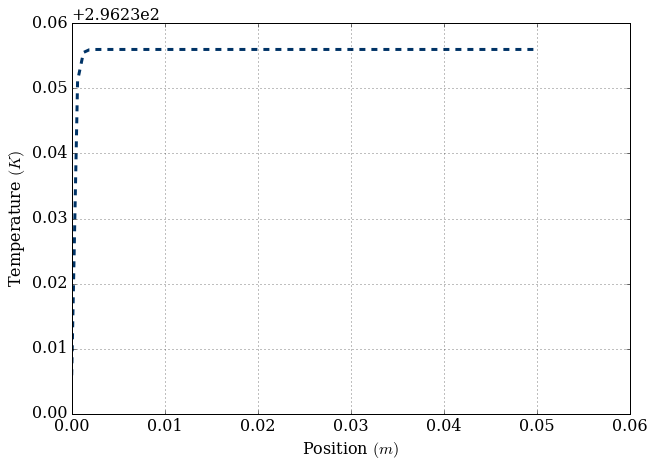

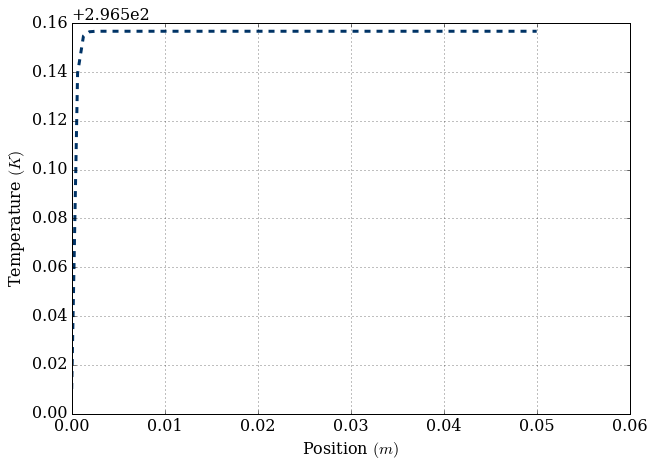

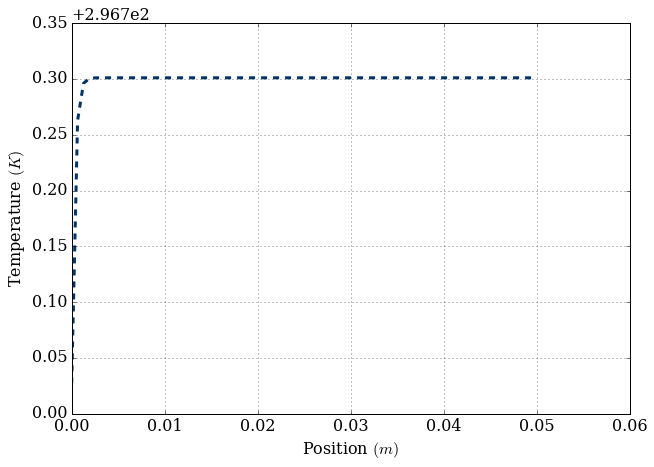

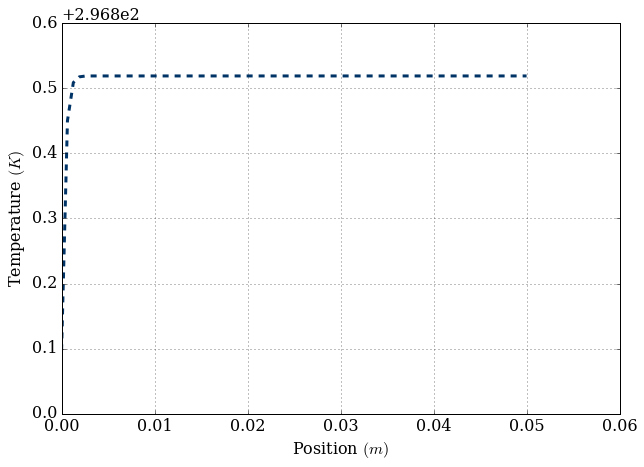

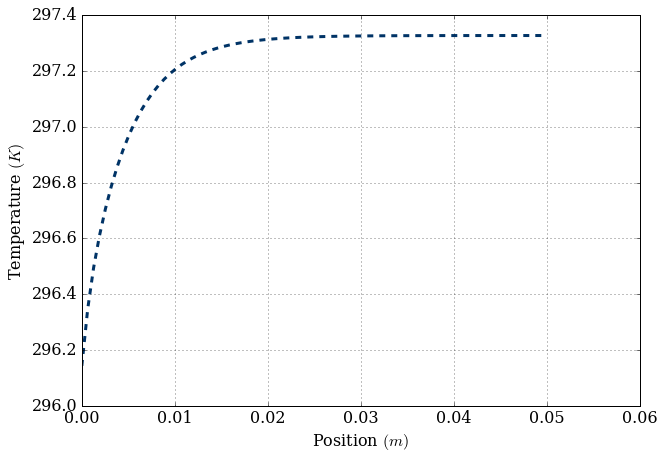

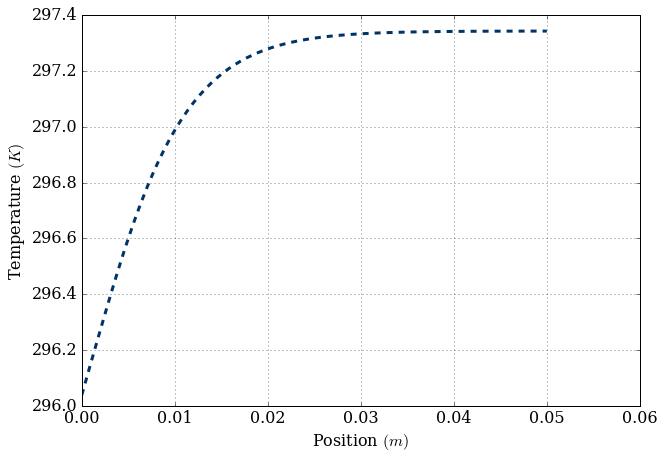

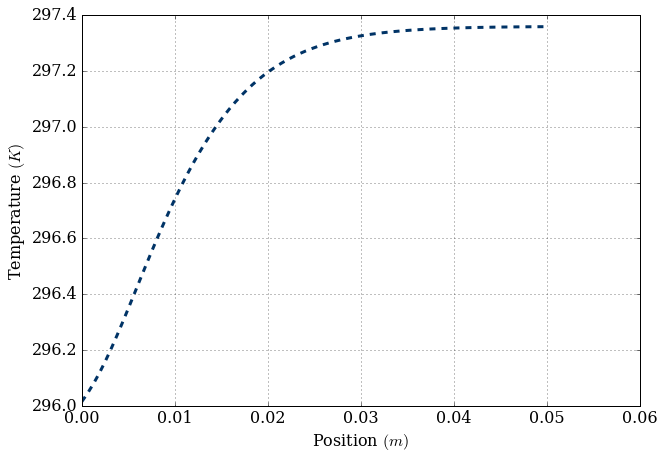

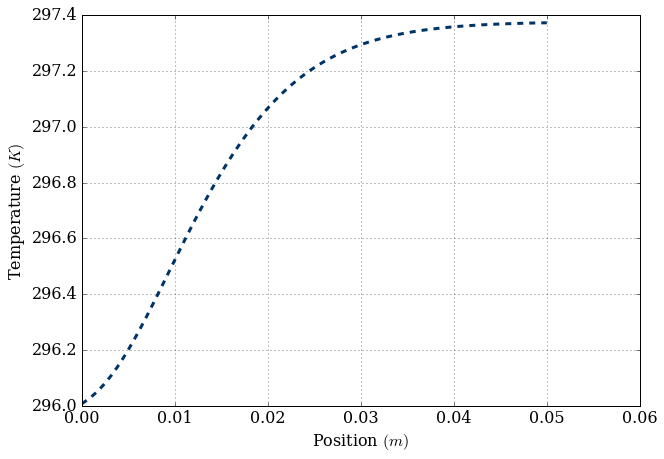

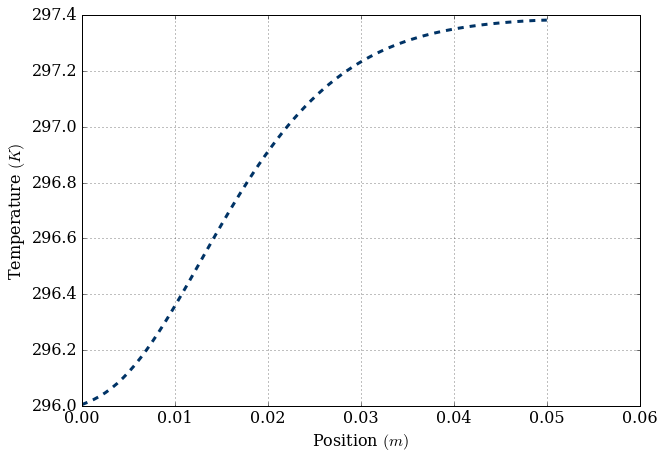

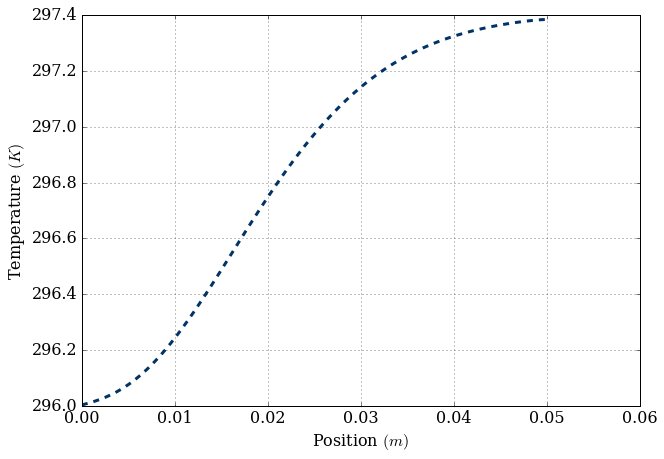

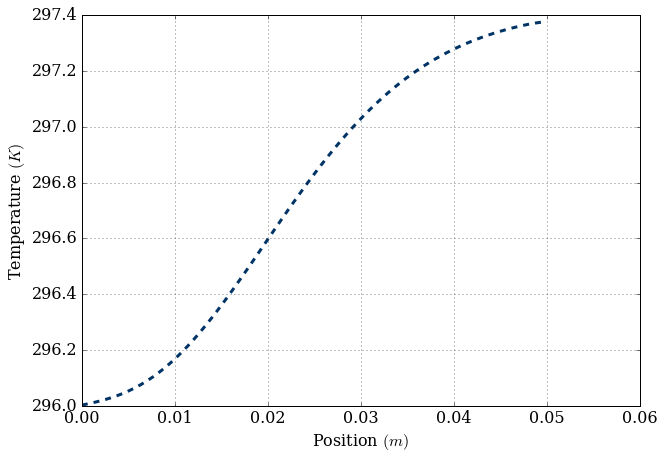

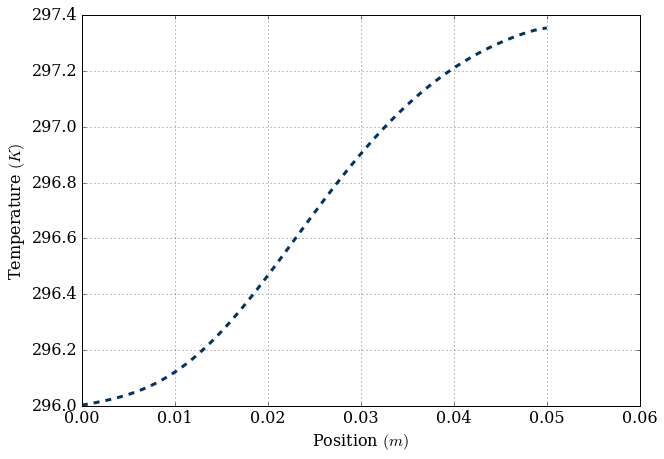

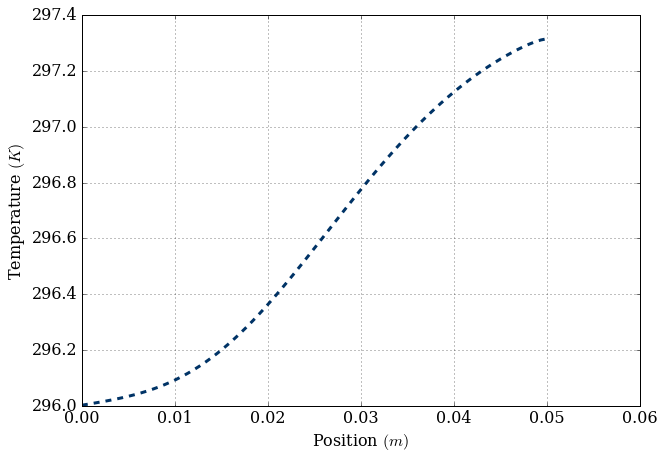

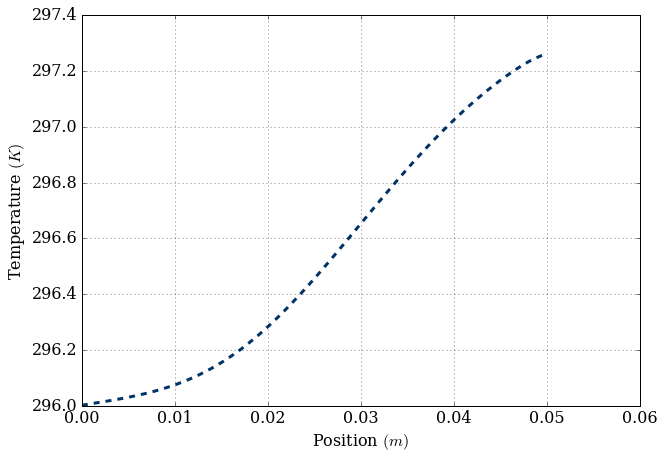

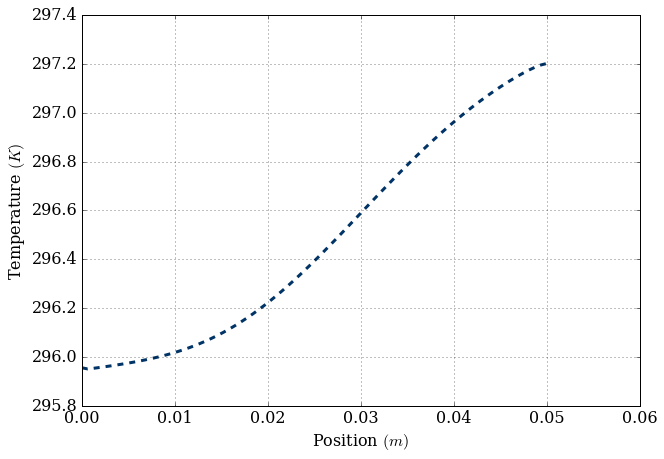

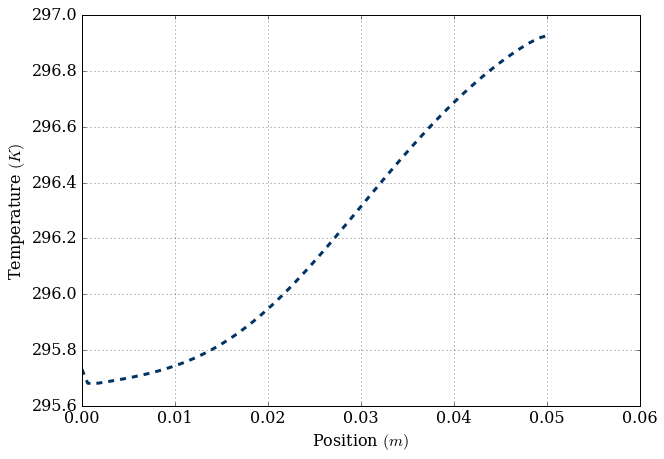

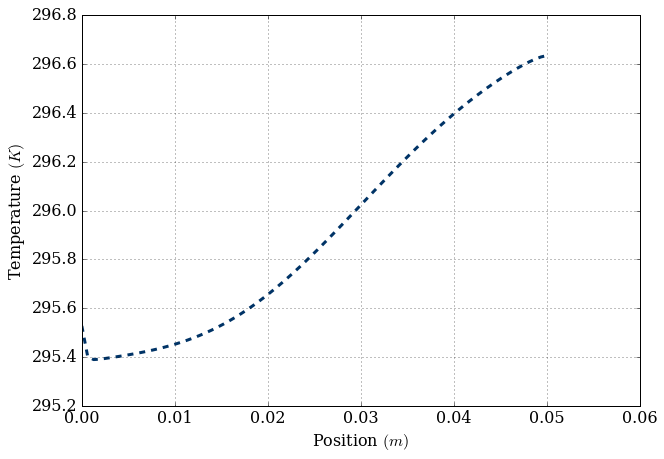

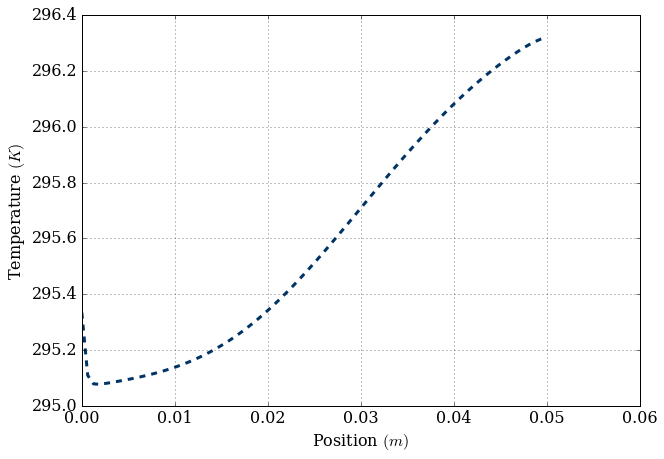

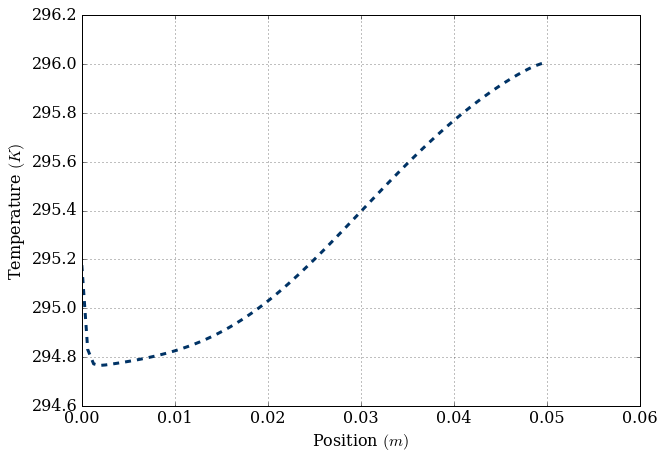

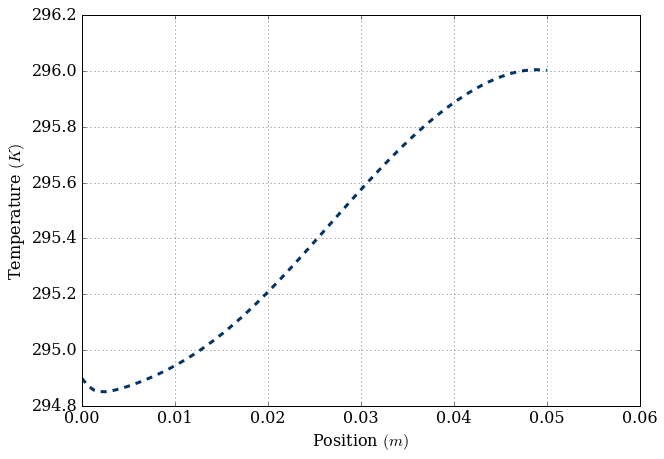

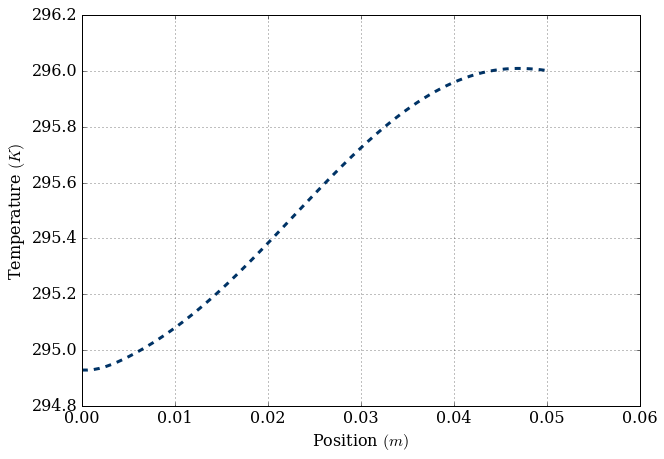

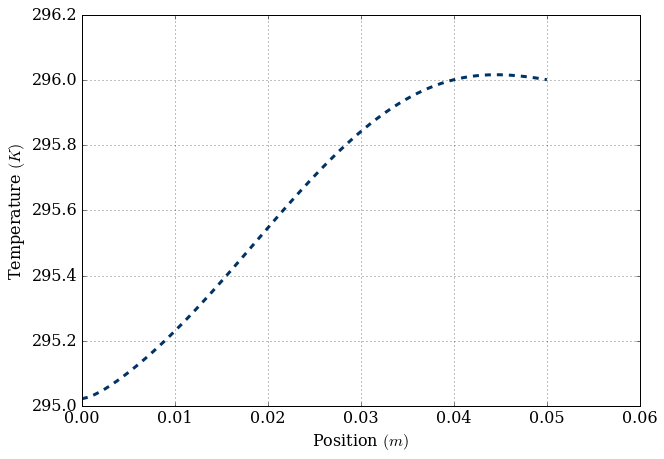

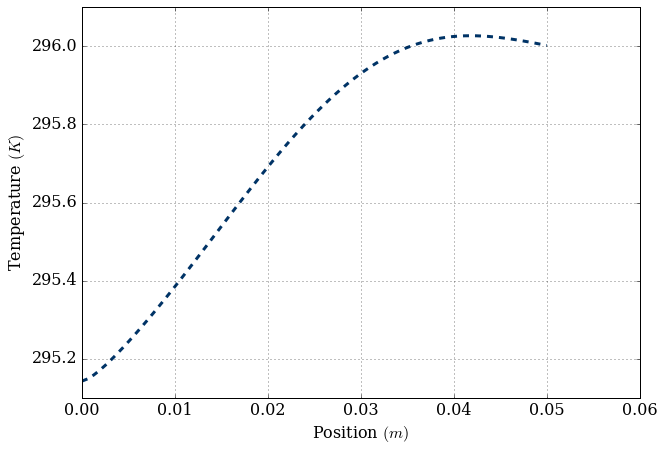

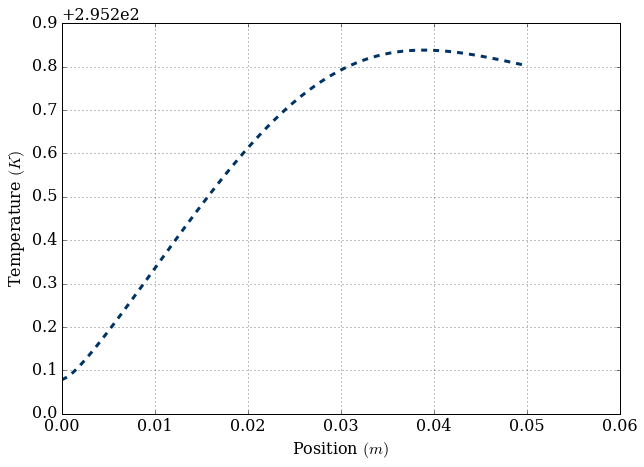

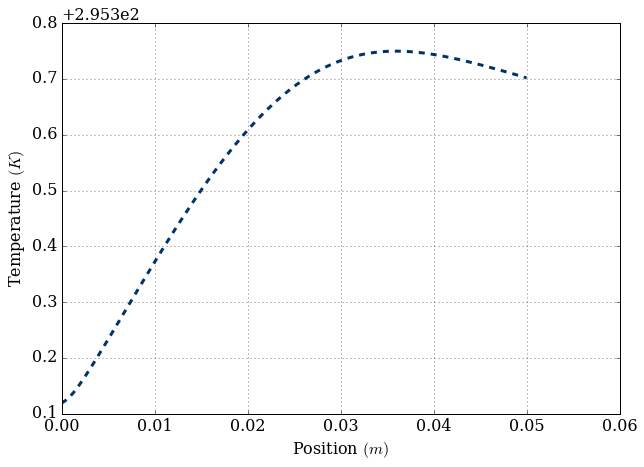

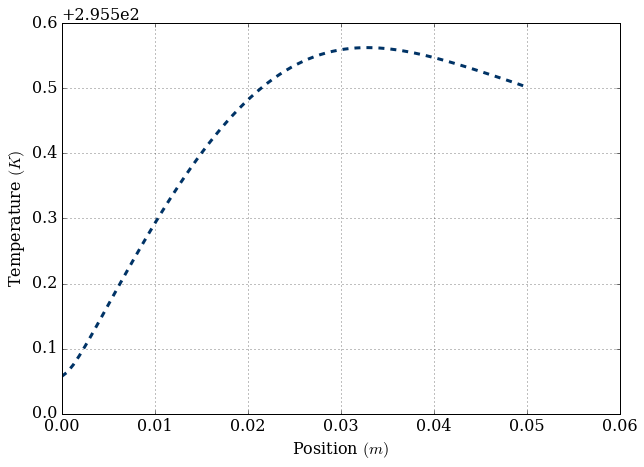

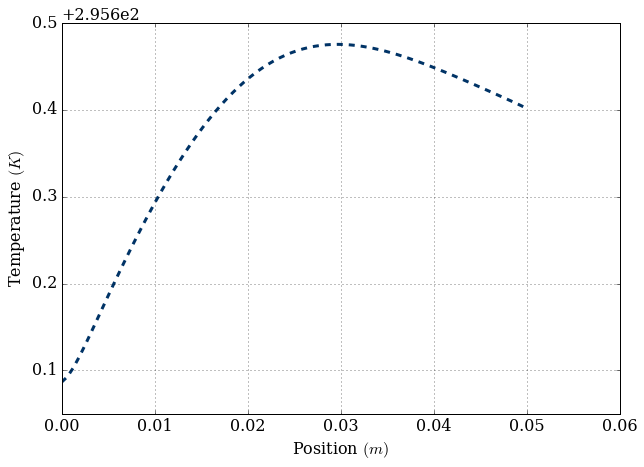

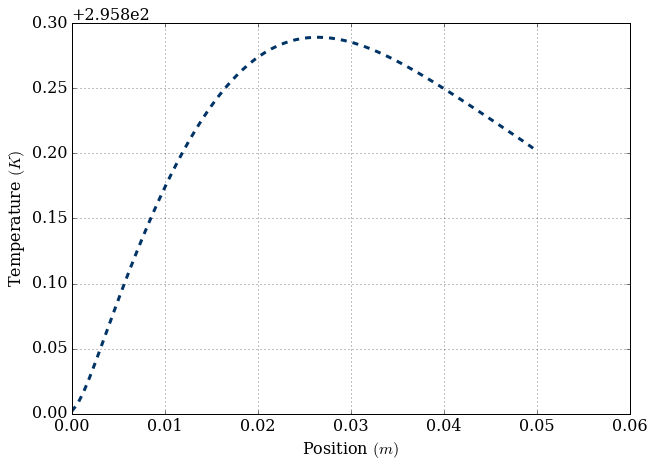

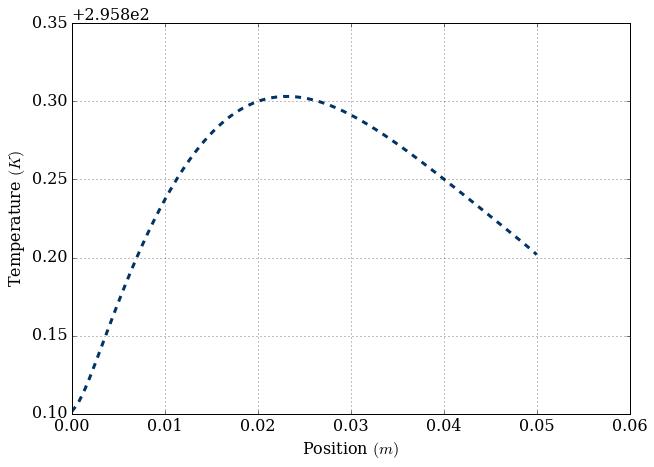

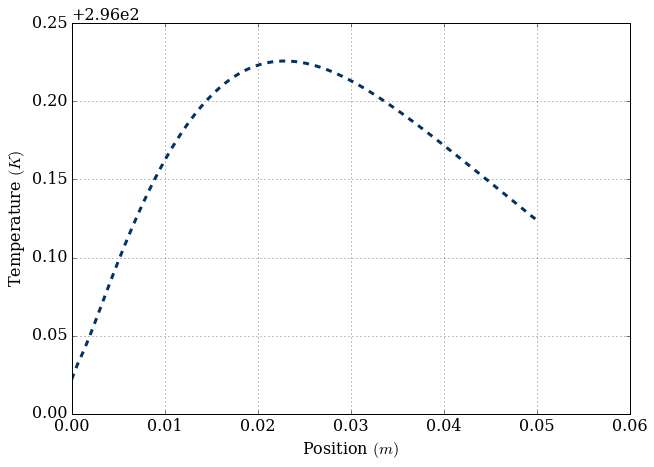

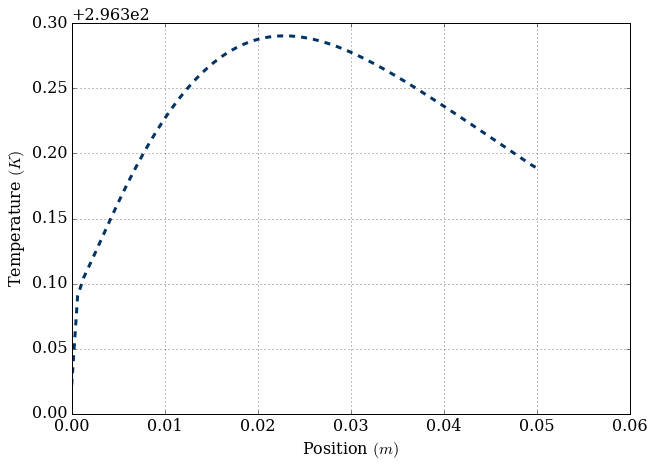

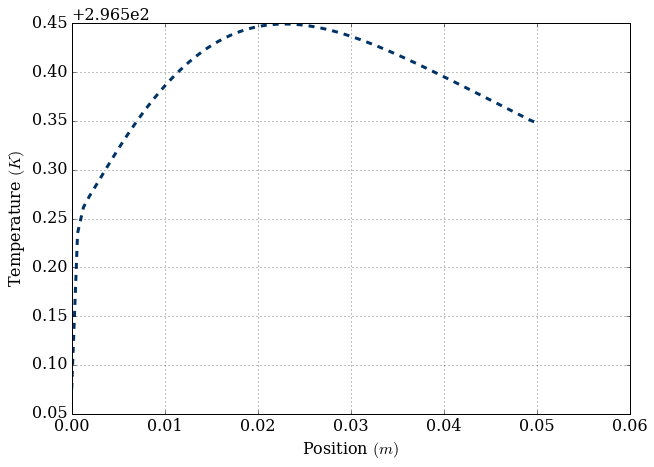

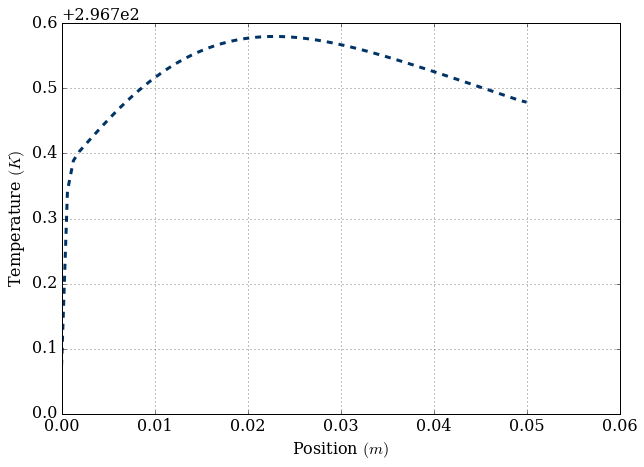

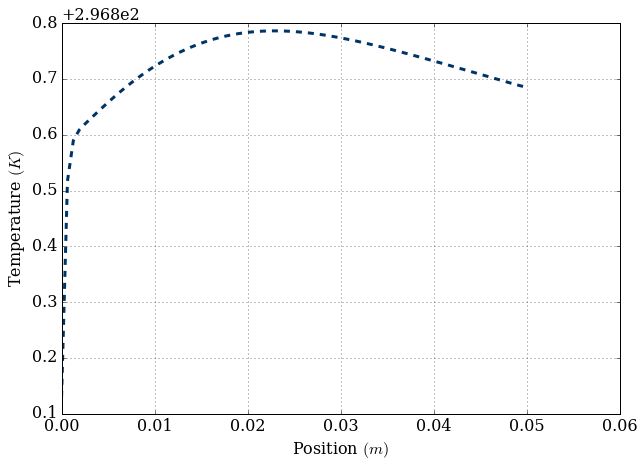

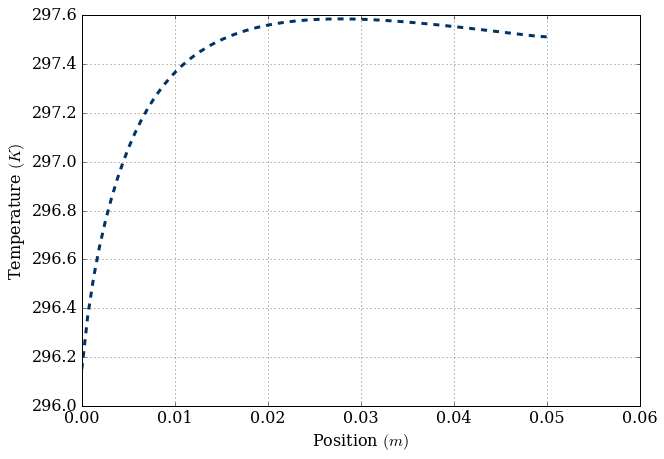

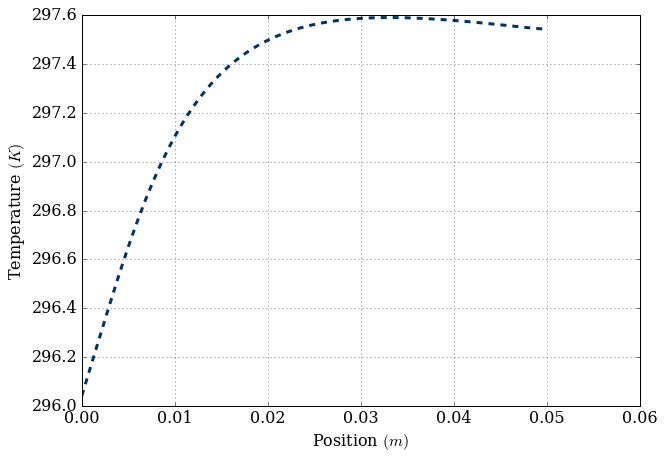

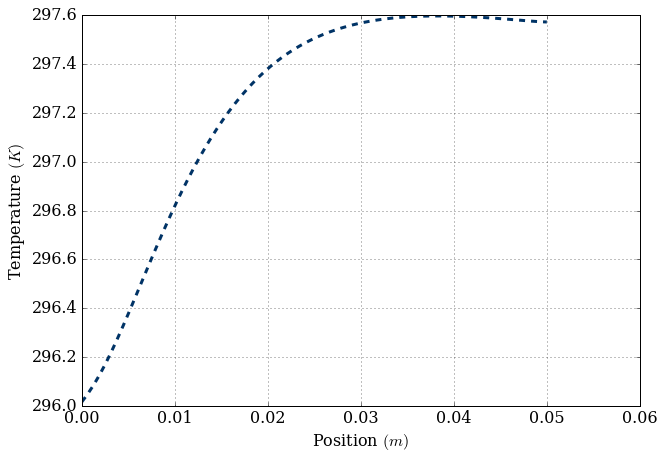

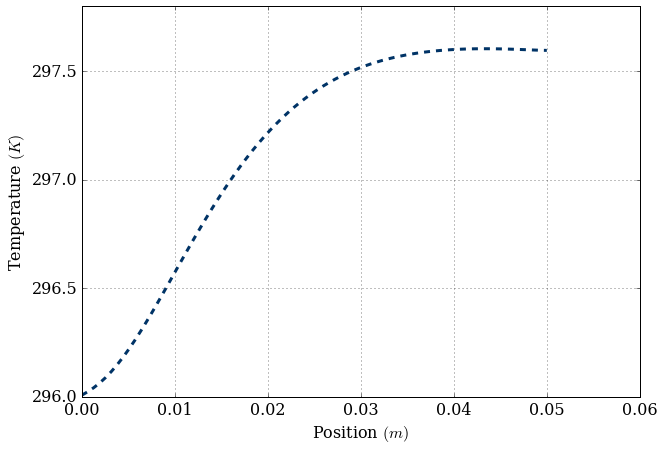

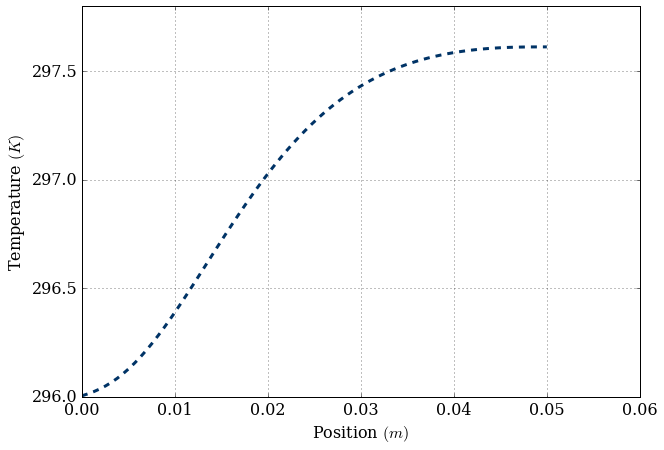

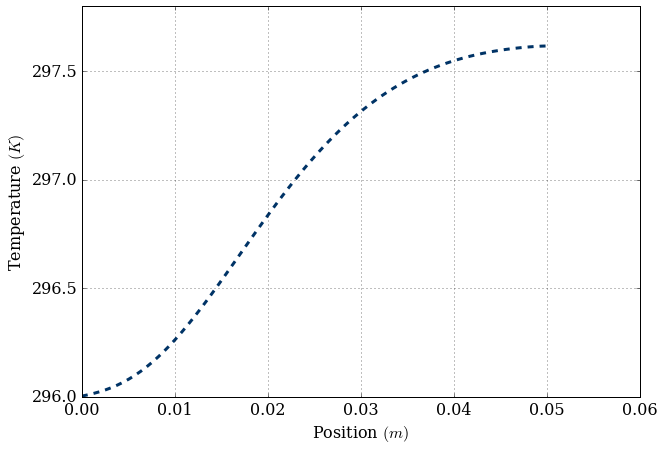

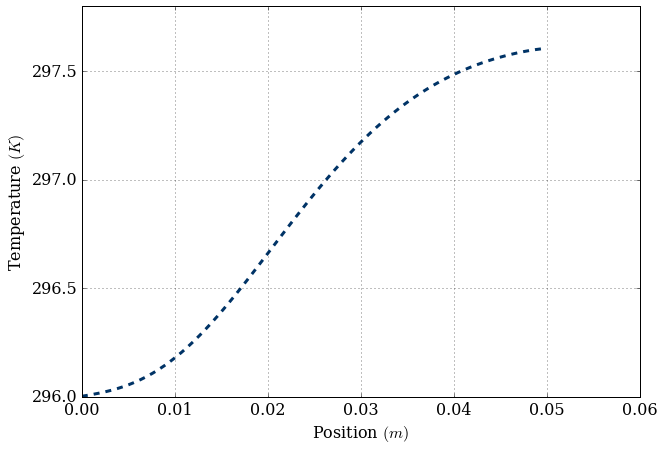

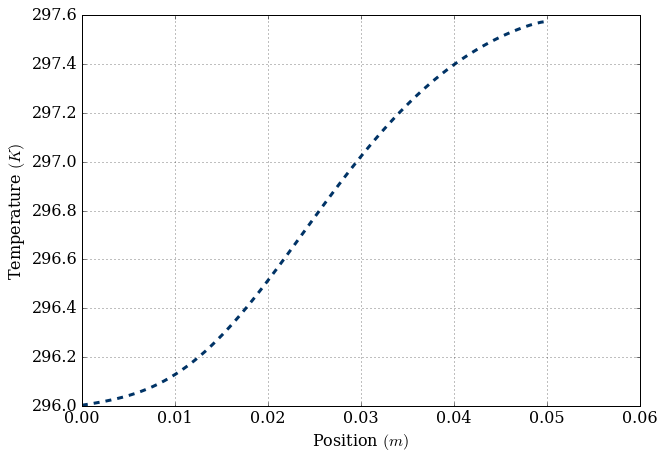

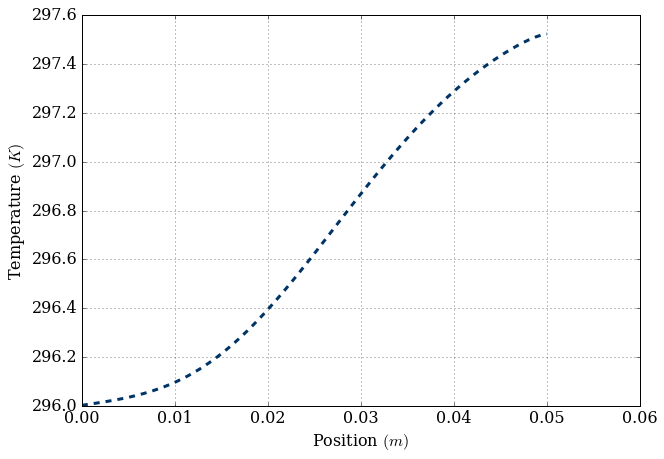

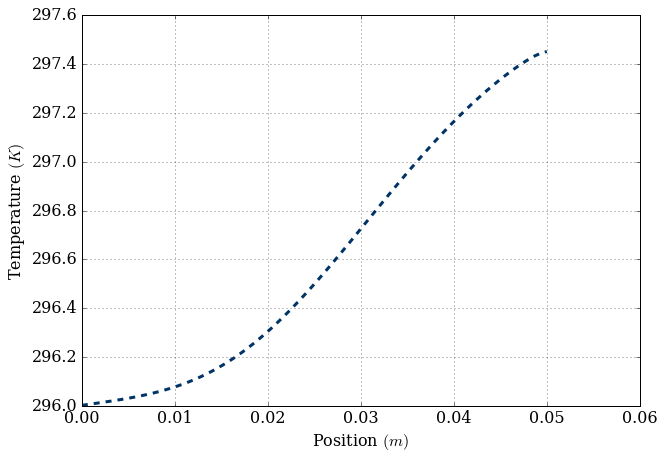

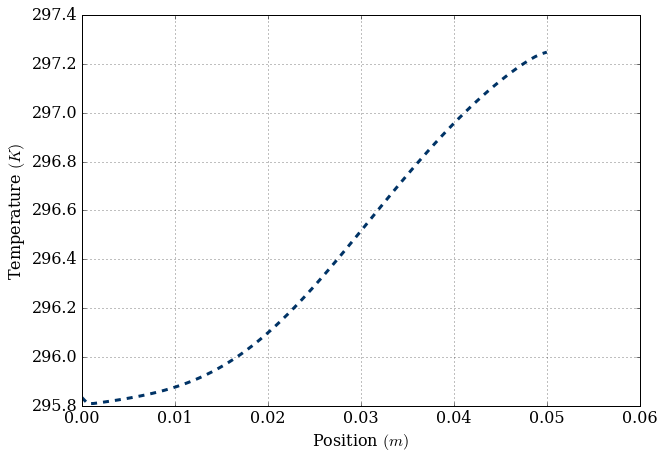

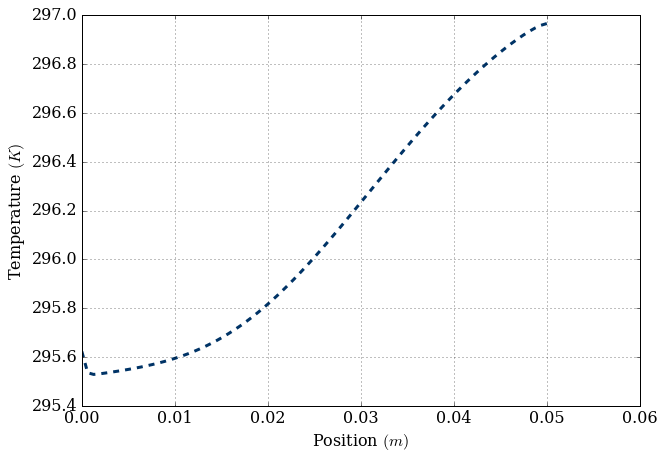

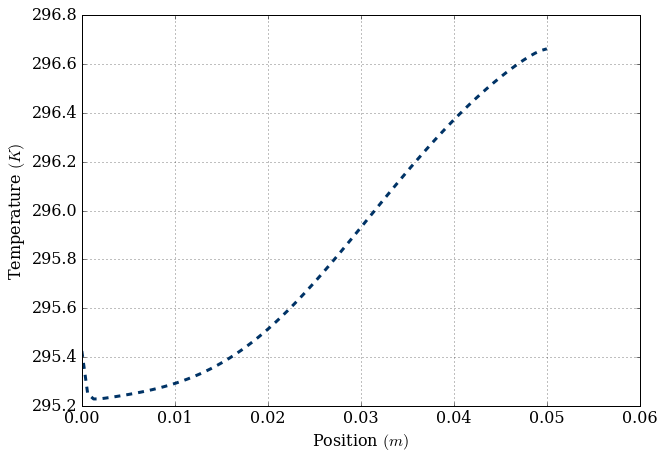

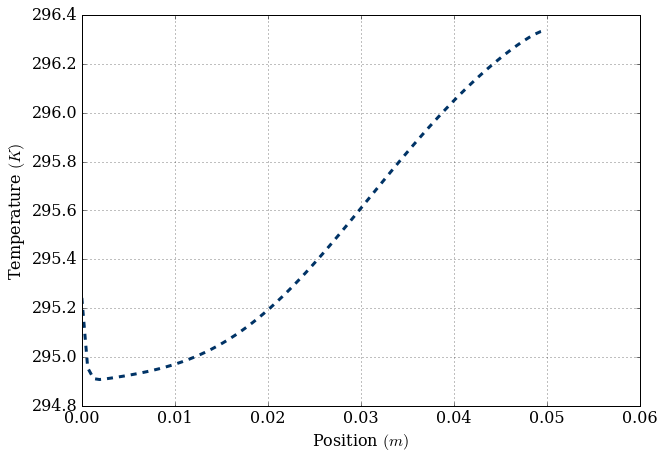

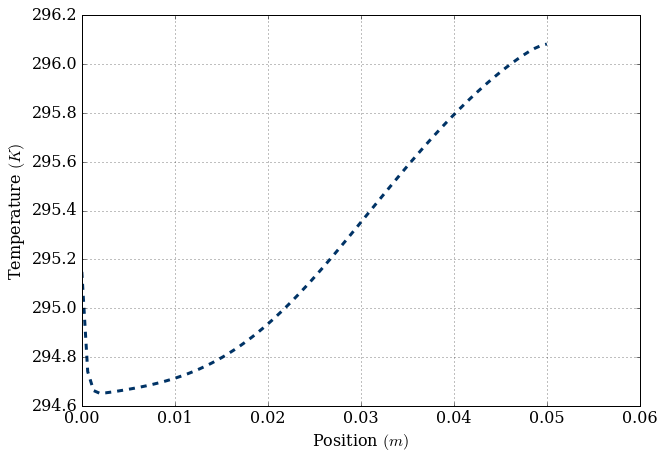

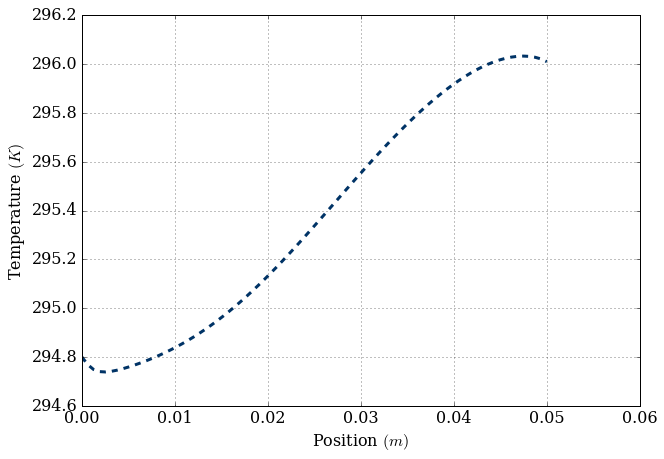

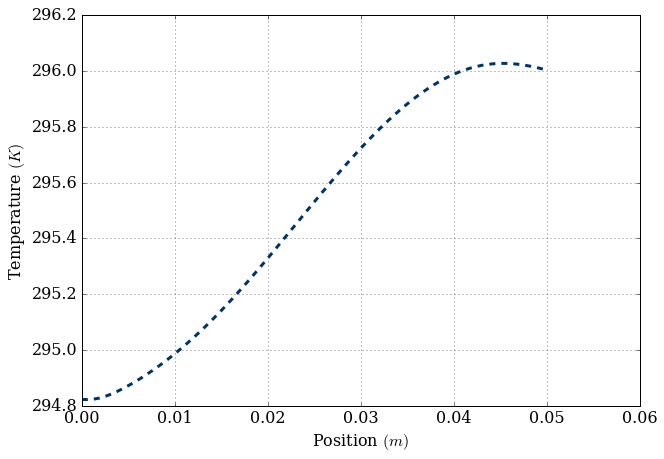

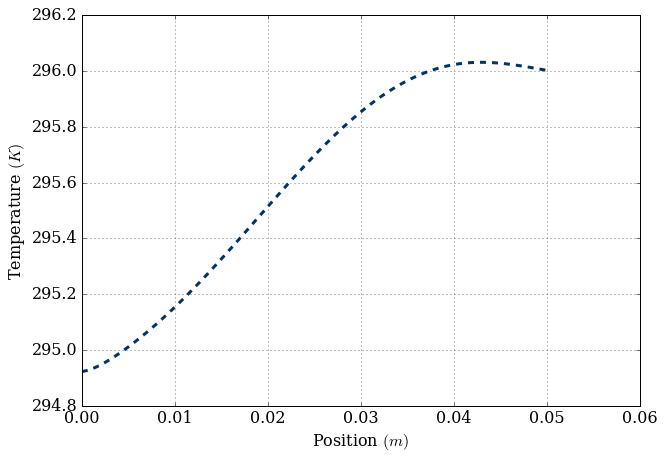

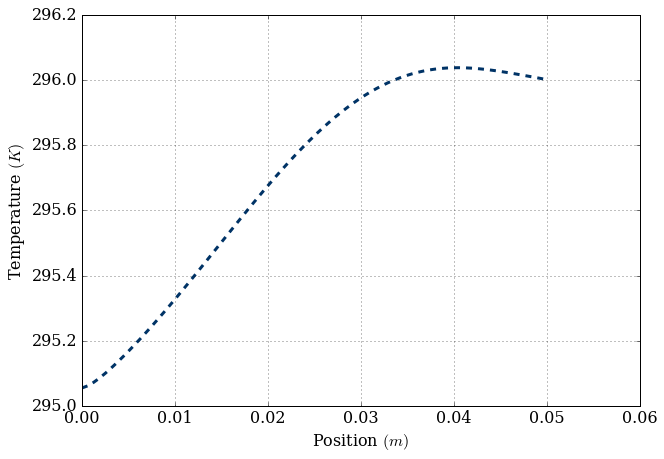

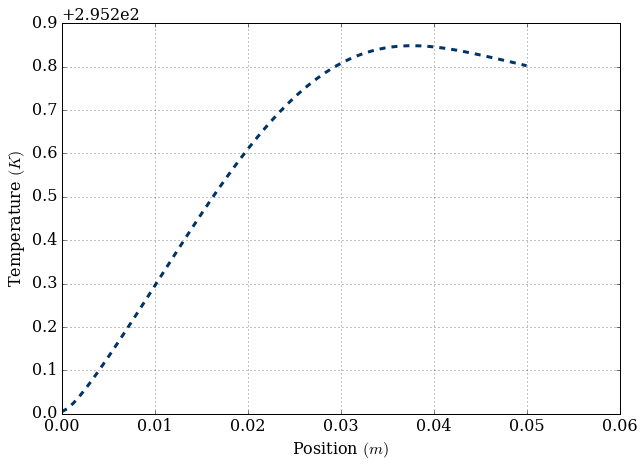

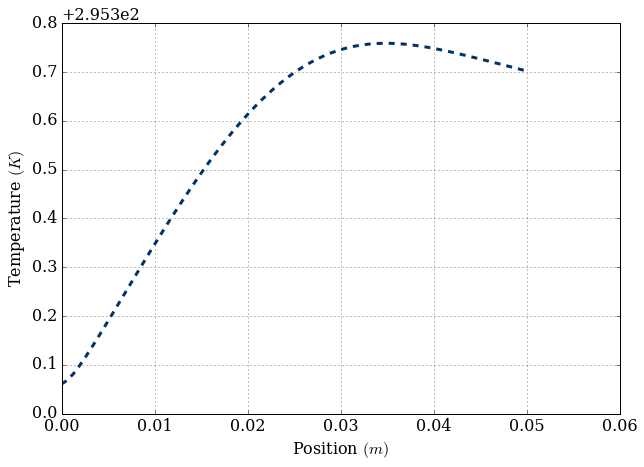

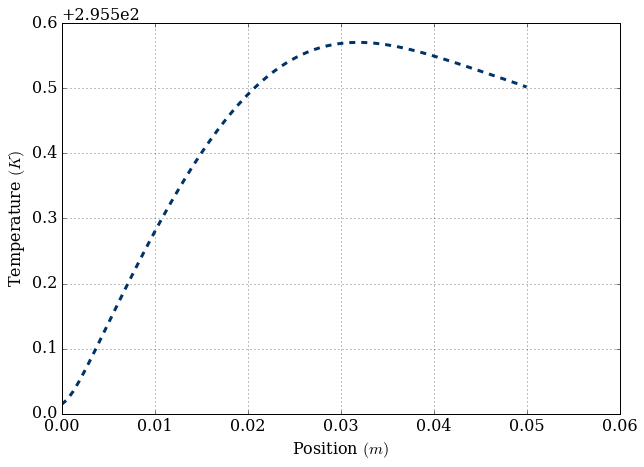

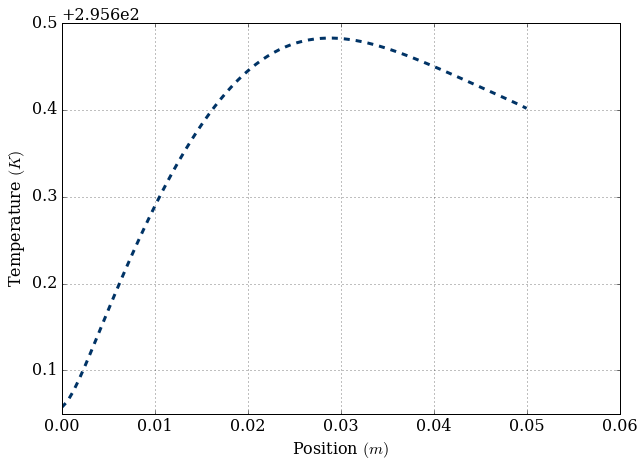

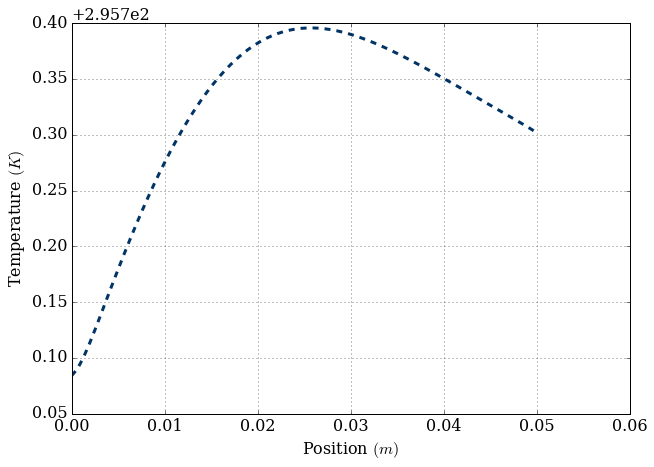

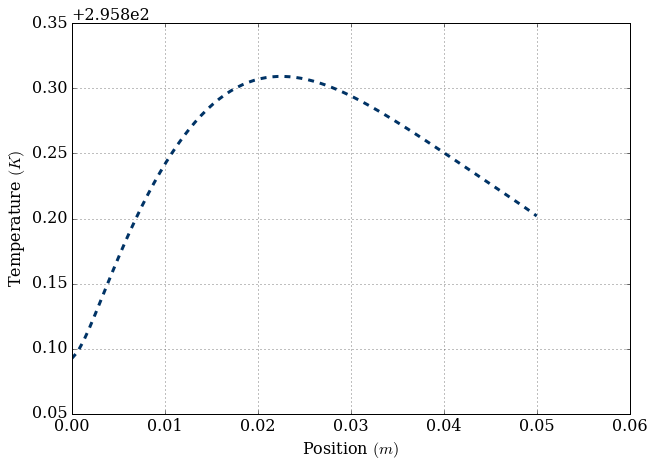

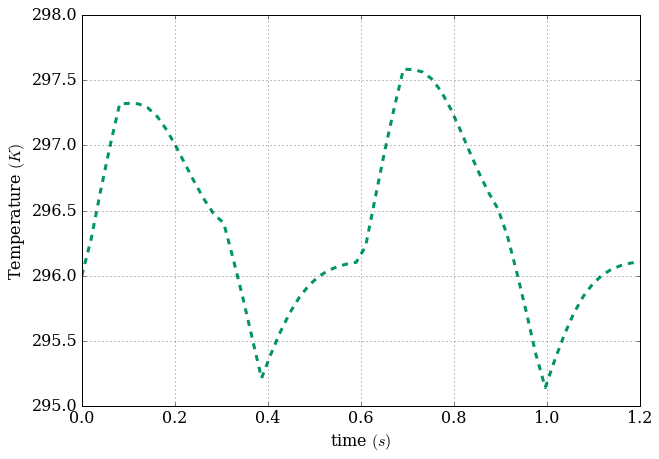

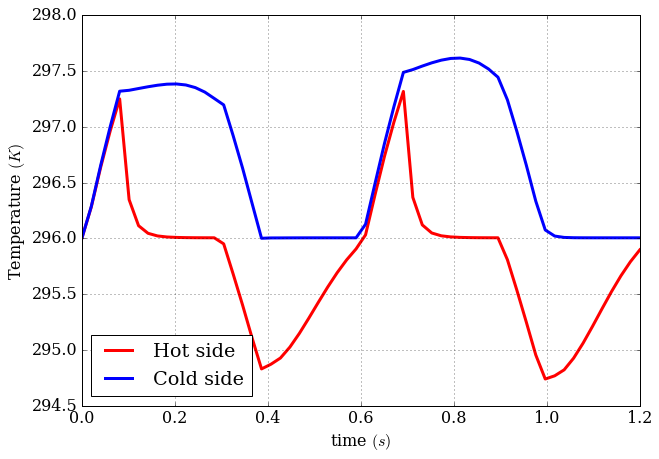

In [33]:
nx = 80
tot_time = 1.2
dt = 0.02
nt = int(tot_time/dt)


T_fluid = numpy.ones(nx)*296. #### Initial Temp
T_solid = numpy.ones(nx)*296. #### Initial Temp

T_cold = 296.
T_hot = 296.

## magnetic variables
B_max = 0.515
B_min = 0.01
t_mag = .1
t_demag = .1
t_flow1 = .2
t_flow2 = .2

## geometric parameters
d_p = 2.0315e-3
A_c = 7.07e-4
L = .05
eps = 0.15
m_dot = 6e-2


    
## water properties
rho_f = 998.
c_f = 4182.
mu_f = 1e-3
k_f = .6


## gadolinium properties
rho_s = 7901.
k_s = 10.5




main(T_fluid, T_solid, nx, nt, tot_time, rho_f, rho_s, c_f, k_s, k_f, mu_f, d_p, A_c, L, \
     eps, m_dot, t_mag, t_demag, t_flow1, t_flow2, T_hot, T_cold, B_max, B_min)